In [1]:
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load file
file_name = '1dspec_total'
file = fits.open(file_name+'.fits')

GRB_data = file[11].data

Gal_data = file[13].data

Gal2_data = file[4].data
#print(Gal2_data["TRACE_SPAT"]) #Checking if we are dealing with the G1 galaxy!

In [2]:
print(Gal_data.columns)

ColDefs(
    name = 'TRACE_SPAT'; format = '1D'
    name = 'FWHMFIT'; format = '1D'
    name = 'OPT_WAVE'; format = '1D'
    name = 'OPT_FLAM'; format = '1D'
    name = 'OPT_FLAM_SIG'; format = '1D'
    name = 'OPT_FLAM_IVAR'; format = '1D'
    name = 'OPT_COUNTS'; format = '1D'
    name = 'OPT_COUNTS_IVAR'; format = '1D'
    name = 'OPT_COUNTS_SIG'; format = '1D'
    name = 'OPT_MASK'; format = '1L'
    name = 'OPT_COUNTS_SKY'; format = '1D'
    name = 'OPT_FRAC_USE'; format = '1D'
    name = 'OPT_CHI2'; format = '1D'
    name = 'BOX_NPIX'; format = '1D'
    name = 'BOX_WAVE'; format = '1D'
    name = 'BOX_FLAM'; format = '1D'
    name = 'BOX_FLAM_SIG'; format = '1D'
    name = 'BOX_FLAM_IVAR'; format = '1D'
    name = 'BOX_COUNTS'; format = '1D'
    name = 'BOX_COUNTS_IVAR'; format = '1D'
    name = 'BOX_COUNTS_SIG'; format = '1D'
    name = 'BOX_MASK'; format = '1L'
    name = 'BOX_COUNTS_SKY'; format = '1D'
    name = 'trace_spec'; format = '1K'
)


In [3]:
wave_GRB = GRB_data["OPT_WAVE"]
flux_GRB = GRB_data["OPT_FLAM"]
noise_GRB = 1./np.sqrt(GRB_data["OPT_FLAM_IVAR"])

C:\Users\Lenti\AppData\Local\Temp\ipykernel_13684\3325724719.py:3: RuntimeWarning: divide by zero encountered in divide
  noise_GRB = 1./np.sqrt(GRB_data["OPT_FLAM_IVAR"])


In [4]:
wave_Gal = Gal_data["OPT_WAVE"]
flux_Gal = Gal_data["OPT_FLAM"]
noise_Gal = 1./np.sqrt(Gal_data["OPT_FLAM_IVAR"])

C:\Users\Lenti\AppData\Local\Temp\ipykernel_13684\309892172.py:3: RuntimeWarning: divide by zero encountered in divide
  noise_Gal = 1./np.sqrt(Gal_data["OPT_FLAM_IVAR"])


In [5]:
wave_Gal2 = Gal2_data["OPT_WAVE"]
flux_Gal2 = Gal2_data["OPT_FLAM"]
noise_Gal2 = 1./np.sqrt(Gal2_data["OPT_FLAM_IVAR"])

C:\Users\Lenti\AppData\Local\Temp\ipykernel_13684\4256426934.py:3: RuntimeWarning: divide by zero encountered in divide
  noise_Gal2 = 1./np.sqrt(Gal2_data["OPT_FLAM_IVAR"])


In [6]:
def binner(flux, wave, noise, binfactor):
    fluxbin = flux[:(flux.size // binfactor) * binfactor].reshape(-1, binfactor).mean(axis=1)
    wavebin = wave[:(wave.size // binfactor) * binfactor].reshape(-1, binfactor).mean(axis=1)
    noisebin = noise[:(noise.size // binfactor) * binfactor].reshape(-1, binfactor).mean(axis=1) / np.sqrt(binfactor)
    #wavebin[np.isnan(noisebin)] = 0
    #fluxbin[np.isnan(noisebin)] = 0
    #noisebin[np.isnan(noisebin)] = 0
    return fluxbin, wavebin, noisebin

In [7]:
fluxbin_GRB, wavebin_GRB, noisebin_GRB = binner(flux_GRB, wave_GRB, noise_GRB, 10)
fluxbin_Gal, wavebin_Gal, noisebin_Gal = binner(flux_Gal, wave_Gal, noise_Gal, 10)
fluxbin_Gal2, wavebin_Gal2, noisebin_Gal2 = binner(flux_Gal2, wave_Gal2, noise_Gal2, 10)

In [8]:
def photometry_func(AB, cent_wave, sigma_AB, GRB=False):
    '''Calculates photometric function and standard deviation of same (primarily to be used for the g, r, z filters)'''
    c = 3e18
    f_lambda_cent = 10**(-0.4*(AB+48.6))*c/cent_wave**2
    #sigma_f_lambda_cent = np.sqrt((np.log(10**(0.4))*f_lambda_cent)**2*sigma_AB**2)
    sigma_f_lambda_cent = (np.log(10**(0.4))*f_lambda_cent)*sigma_AB
    if GRB==False:
        f_lambda_cent /= 5*1e-17
        sigma_f_lambda_cent /= 5*1e-17
    elif GRB==True:
        f_lambda_cent /= 1e-17
        sigma_f_lambda_cent /= 1e-17
    return f_lambda_cent, sigma_f_lambda_cent


In [9]:
wave_r = [5680, 7160]
AB_r = 17.8
sigma_AB_r = 0.03
wave_cent_r = 6420
f_lambda_cent_r, sigma_f_lambda_cent_r = photometry_func(AB_r, wave_cent_r, sigma_AB_r)

wave_g = [3980, 5480]
AB_g = 18.28
sigma_AB_g = 0.02
wave_cent_g = 4730
f_lambda_cent_g, sigma_f_lambda_cent_g = photometry_func(AB_g, wave_cent_g, sigma_AB_g)

wave_z = [8500, 10020]
AB_z = 17.34
sigma_AB_z = 0.05
wave_cent_z = 9260
f_lambda_cent_z, sigma_f_lambda_cent_z = photometry_func(AB_z, wave_cent_z, sigma_AB_z)

wave_cent_i = 7840
wave_i = [7100, 8570]

AB_r_GRB = 22.
sigma_AB_r_GRB = 0.19

AB_g_GRB = 22.35
sigma_AB_g_GRB = 0.26

AB_i_GRB = 21.68
sigma_AB_i_GRB = 0.09

AB_z_GRB = 21.5
sigma_AB_z_GRB = 0.12

f_lambda_cent_r_GRB, sigma_f_lambda_cent_r_GRB = photometry_func(AB_r_GRB, wave_cent_r, sigma_AB_r_GRB,  GRB=True)
f_lambda_cent_g_GRB, sigma_f_lambda_cent_g_GRB = photometry_func(AB_g_GRB, wave_cent_g, sigma_AB_g_GRB, GRB=True)
f_lambda_cent_i_GRB, sigma_f_lambda_cent_i_GRB = photometry_func(AB_i_GRB, wave_cent_i, sigma_AB_i_GRB, GRB=True)
f_lambda_cent_z_GRB, sigma_f_lambda_cent_z_GRB = photometry_func(AB_z_GRB, wave_cent_z, sigma_AB_z_GRB, GRB=True)

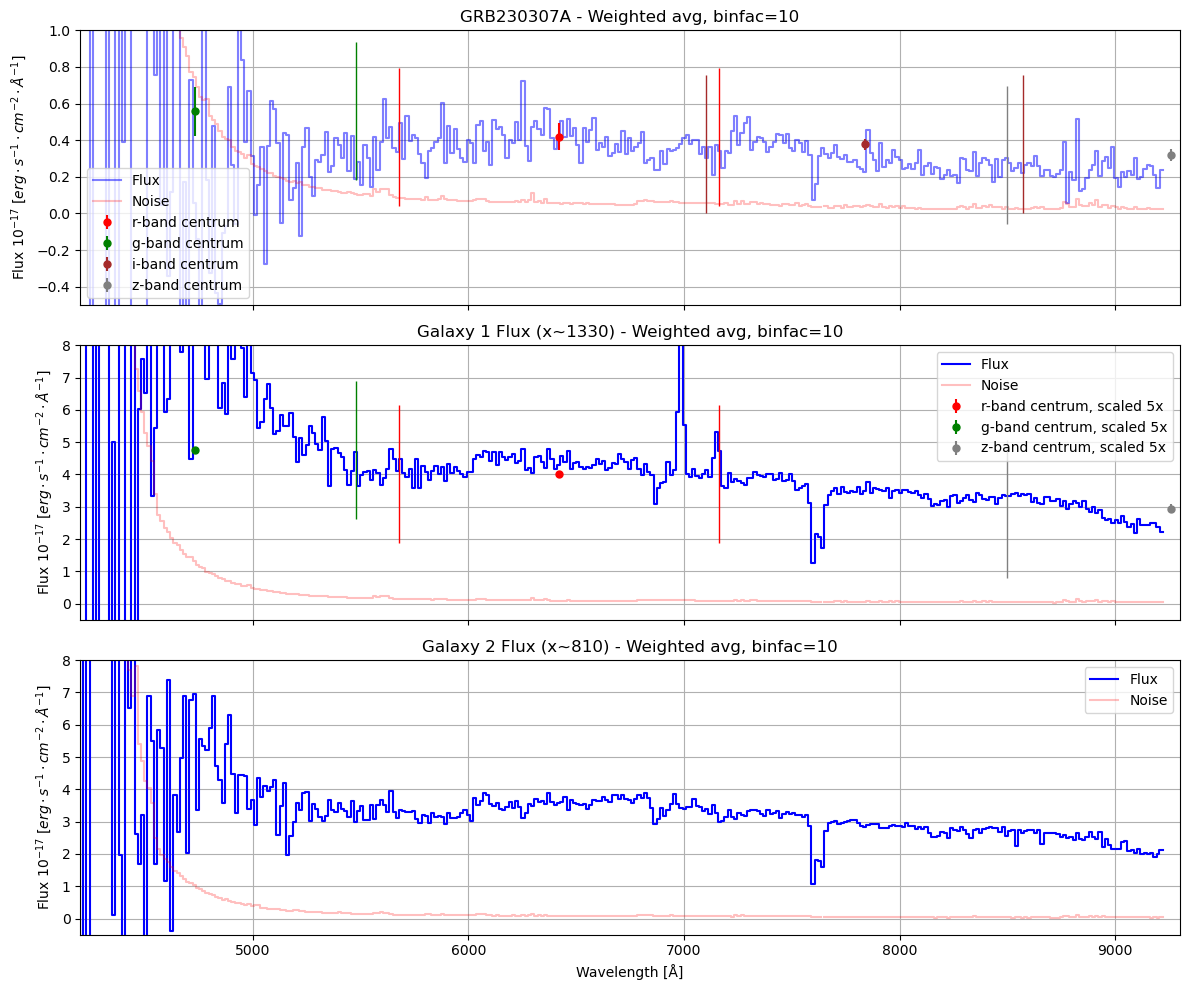

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1, 1, 1]}, sharex=True)

ax1.step(wavebin_GRB,fluxbin_GRB, label="Flux", color="blue", alpha=0.5)
ax1.step(wavebin_Gal,noisebin_GRB, label="Noise", color="red", alpha=0.25)

#ax1.plot(wave_cent_r, f_lambda_cent_r_GRB, "r*", ms=10, color="red", label="r-band centrum")
ax1.errorbar(wave_cent_r, f_lambda_cent_r_GRB, yerr=sigma_f_lambda_cent_r_GRB, fmt=".", ms=10, color="red", label="r-band centrum")
ax1.plot(wave_r[0], f_lambda_cent_r_GRB, "|", ms=100, color="red")
ax1.plot(wave_r[1], f_lambda_cent_r_GRB, "|", ms=100, color="red")

#ax1.plot(wave_cent_g, f_lambda_cent_g_GRB, "r*", ms=10, color="green", label="g-band centrum")
ax1.errorbar(wave_cent_g, f_lambda_cent_g_GRB, yerr=sigma_f_lambda_cent_g_GRB, fmt=".", ms=10, color="green", label="g-band centrum")
ax1.plot(wave_g[0], f_lambda_cent_g_GRB, "|", ms=100, color="green")
ax1.plot(wave_g[1], f_lambda_cent_g_GRB, "|", ms=100, color="green")

#ax1.plot(wave_cent_i, f_lambda_cent_i_GRB, "r*", ms=10, color="brown", label="i-band centrum")
ax1.errorbar(wave_cent_i, f_lambda_cent_i_GRB, yerr=sigma_f_lambda_cent_i_GRB, fmt=".", ms=10, color="brown", label="i-band centrum")
ax1.plot(wave_i[0], f_lambda_cent_i_GRB, "|", ms=100, color="brown")
ax1.plot(wave_i[1], f_lambda_cent_i_GRB, "|", ms=100, color="brown")


#ax1.plot(wave_cent_z, f_lambda_cent_z_GRB, "r*", ms=10, color="grey", label="z-band centrum")
ax1.errorbar(wave_cent_z, f_lambda_cent_z_GRB, yerr=sigma_f_lambda_cent_z_GRB, fmt=".", ms=10, color="grey", label="z-band centrum")
ax1.plot(wave_z[0], f_lambda_cent_z_GRB, "|", ms=100, color="grey")
ax1.plot(wave_z[1], f_lambda_cent_z_GRB, "|", ms=100, color="grey")

ax1.set_ylim(-0.5,1.)
ax1.set_xlim(4200,9300.)
ax1.set_title("GRB230307A - Weighted avg, binfac=10")
ax1.set_ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]")
ax1.grid()
ax1.legend()

ax2.step(wavebin_Gal,fluxbin_Gal, label="Flux", color="blue")
ax2.step(wavebin_Gal,noisebin_Gal, label="Noise", color="red", alpha=0.25)

#ax2.plot(wave_cent_r, f_lambda_cent_r, "r*", ms=10, color="red", label="r-band centrum, scaled 5x")
ax2.errorbar(wave_cent_r, f_lambda_cent_r, yerr=sigma_f_lambda_cent_r, fmt=".", ms=10, color="red", label="r-band centrum, scaled 5x")
ax2.plot(wave_r[0], f_lambda_cent_r, "|", ms=100, color="red")
ax2.plot(wave_r[1], f_lambda_cent_r, "|", ms=100, color="red")

#ax2.plot(wave_cent_g, f_lambda_cent_g, "r*", ms=10, color="green", label="g-band centrum, scaled 5x")
ax2.errorbar(wave_cent_g, f_lambda_cent_g, yerr=sigma_f_lambda_cent_g, fmt=".", ms=10, color="green", label="g-band centrum, scaled 5x")
ax2.plot(wave_g[0], f_lambda_cent_g, "|", ms=100, color="green")
ax2.plot(wave_g[1], f_lambda_cent_g, "|", ms=100, color="green")

#ax2.plot(wave_cent_z, f_lambda_cent_z, "r*", ms=10, color="grey", label="z-band centrum, scaled 5x")
ax2.errorbar(wave_cent_z, f_lambda_cent_z, yerr=sigma_f_lambda_cent_z, fmt=".", ms=10, color="grey", label="z-band centrum, scaled 5x")
ax2.plot(wave_z[0], f_lambda_cent_z, "|", ms=100, color="grey")
ax2.plot(wave_z[1], f_lambda_cent_z, "|", ms=100, color="grey")

ax2.set_ylim(-0.5,8.)
ax2.set_xlim(4200,9300.)
ax2.set_title("Galaxy 1 Flux (x~1330) - Weighted avg, binfac=10")
ax2.set_ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]")
ax2.grid()
ax2.legend()

ax3.step(wavebin_Gal2,fluxbin_Gal2,color='blue', label="Flux")
ax3.step(wavebin_Gal2,noisebin_Gal2,color='red', label="Noise", alpha=0.25)
ax3.set_title("Galaxy 2 Flux (x~810) - Weighted avg, binfac=10")
ax3.set_ylim(-0.5, 8.)
ax3.set_xlabel("Wavelength [Å]")
ax3.set_ylabel("Flux $10^{-17}$ [$erg \cdot s^{-1} \cdot cm^{-2} \cdot Å^{-1}$]")
ax3.grid()
ax3.legend()

fig.set_size_inches(12, 10)
plt.tight_layout()
plt.show()

In [11]:
print("Average flux over G1 green-band range: ", np.mean(fluxbin_Gal[75:135]))
print("Photometric flux of G1 g-band:", f_lambda_cent_g, " +/-", sigma_f_lambda_cent_g)

Average flux over G1 green-band range:  4.318112643551717
Photometric flux of G1 g-band: 4.747106432292887  +/- 0.08744493204682999


In [12]:
print("Average flux over GRB green-band range: ", np.mean(fluxbin_GRB[75:135]))
print("Photometric flux of GRB g-band: ", f_lambda_cent_g_GRB, " +/- ", sigma_f_lambda_cent_g_GRB)

Average flux over GRB green-band range:  0.3449733916776226
Photometric flux of GRB g-band:  0.5589834801974705  +/-  0.1338591309881933


### Problems are now very clear to see... The flux of the photometrics compared to an average of the flux of the range in the green-band (which covers the noisy part of the transient spectrum) differs between G1 and the GRB transient. One is below, the other above relative to each other...